<a href="https://colab.research.google.com/github/atchutannavivekkumar/codsoft-dataanalytics/blob/main/codsoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TITANIC SURVIVAL PREDICTION

In this code we are going to download the data from kaggle (https://www.kaggle.com/datasets/yasserh/titanic-dataset). The data is about the people survived and died in the titanic accidet and it cantain various factor such as age, coachno, sex of the passenger and more.

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


# Load the dataset
titanic_data = pd.read_csv('/content/Titanic-Dataset.csv')




In [ ]:
print(titanic_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


From above we can see how is the data and there are many missing values in the dataset. Analysing  with missing data can led to miss calucation or prediction of the results. So we need to replace the null values with interpolation the information with mean, median values. And we can remove the column which is less used.

In [ ]:
# Drop unnecessary columns
titanic_data_cleaned = titanic_data.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

# Handle missing values
imputer_age = SimpleImputer(strategy="median")
titanic_data_cleaned["Age"] = imputer_age.fit_transform(titanic_data_cleaned[["Age"]])

 # Encode categorical variables
label_encoder_sex = LabelEncoder()
titanic_data_cleaned["Sex"] = label_encoder_sex.fit_transform(titanic_data_cleaned["Sex"])

label_encoder_embarked = LabelEncoder()
titanic_data_cleaned["Embarked"] = label_encoder_embarked.fit_transform(titanic_data_cleaned["Embarked"])


# Separate features and target variable
X = titanic_data_cleaned.drop(columns=["Survived"])
y = titanic_data_cleaned["Survived"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(titanic_data_cleaned.head())



   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2


In [ ]:

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Confusion Matrix:
 [[90 15]
 [19 55]]


In [ ]:
# Group data by 'Sex' and 'Survived' to calculate the counts
survival_by_sex = titanic_data.groupby(['Sex', 'Survived']).size().unstack()

# Rename columns for better readability
survival_by_sex.columns = ['Did not survive', 'Survived']

# Calculate the difference in the number of survivors
survival_by_sex['Difference'] = survival_by_sex['Survived'] - survival_by_sex['Did not survive']

print(survival_by_sex)


        Did not survive  Survived  Difference
Sex                                          
female               81       233         152
male                468       109        -359


<ipython-input-41-1af79cd792ce>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='People survived', fontsize=12)


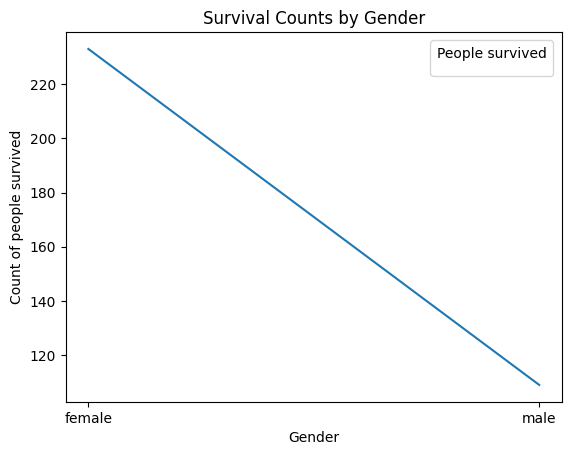

In [ ]:
plt.plot(survival_by_sex['Survived'])
plt.title('Survival Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of people survived')
plt.legend(title='People survived', fontsize=12)
plt.show()

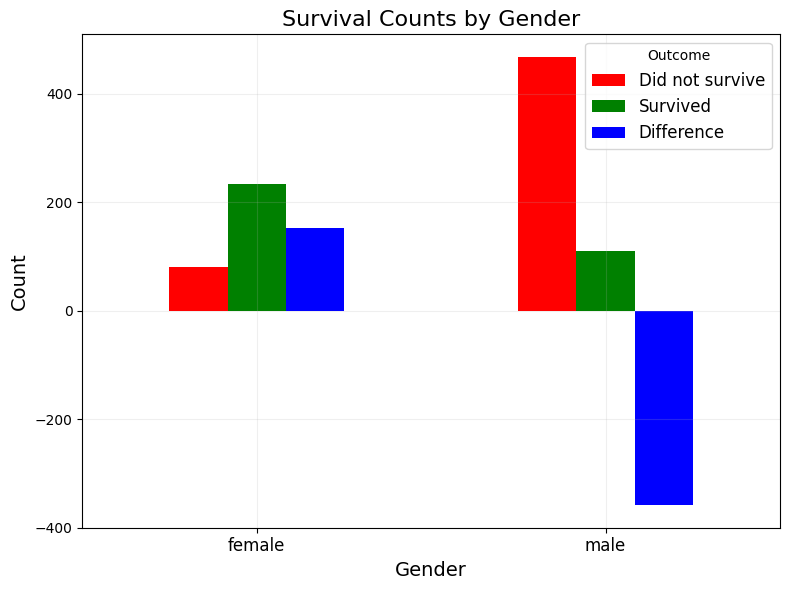

In [ ]:
survival_by_sex.plot(kind='bar', figsize=(8, 6), color=['red', 'green','blue'])

# Add labels and title
plt.title('Survival Counts by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Outcome', fontsize=12)
plt.grid(axis='y', linestyle='-', alpha=0.2)
plt.grid(axis='x', linestyle='-', alpha=0.2)
# Show the plot
plt.tight_layout()
plt.show()

task 2


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
from inspect import ismemberdescriptor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


# Load the dataset
imdb_movie = pd.read_csv('/content/IMDb_Movies_India.csv',encoding='ISO-8859-1')



In [17]:
imdb_movie.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [16]:
print(imdb_movie.isnull().sum())

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [20]:
imdb_movie.duplicated().sum()


6

In [23]:
imdb_movie.dropna(inplace=True)
imdb_movie.drop_duplicates(inplace=True)


In [25]:
imdb_movie['Year'] = imdb_movie['Year'].str.replace(r'\(|\)', '', regex=True).astype(int)
imdb_movie['Duration'] = pd.to_numeric(imdb_movie['Duration'].str.replace(' min', ''))
imdb_movie['Votes'] = pd.to_numeric(imdb_movie['Votes'].str.replace(',', ''))

In [26]:
imdb_movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [28]:
imdb_movie.describe(include='all')


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,5659,5659.000000,5659.000000,5659,5659.000000,5659.000000,5659,5659,5659,5659
unique,5385,NaN,NaN,376,NaN,NaN,2431,1960,2321,2556
top,Baazi,NaN,NaN,Drama,NaN,NaN,David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,4,NaN,NaN,844,NaN,NaN,41,104,52,57
mean,NaN,1996.247570,133.439124,NaN,5.898533,2697.649585,NaN,NaN,NaN,NaN
std,NaN,19.741839,25.319939,NaN,1.381165,13651.503584,NaN,NaN,NaN,NaN
min,NaN,1931.000000,21.000000,NaN,1.100000,5.000000,NaN,NaN,NaN,NaN
25%,NaN,1983.000000,119.000000,NaN,5.000000,30.000000,NaN,NaN,NaN,NaN
50%,NaN,2002.000000,135.000000,NaN,6.100000,131.000000,NaN,NaN,NaN,NaN
75%,NaN,2013.000000,150.000000,NaN,6.900000,922.500000,NaN,NaN,NaN,NaN


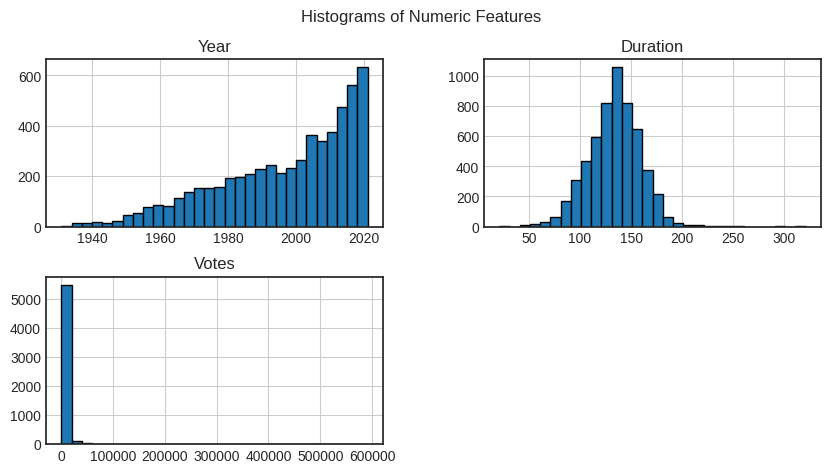

In [29]:
plt.style.use('seaborn-v0_8-white')
imdb_movie[['Year', 'Duration', 'Votes']].hist(bins=30, edgecolor='black',figsize=(10, 5))
plt.suptitle('Histograms of Numeric Features')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
